# Criando um modelo de identificação de fraudes
- https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
- Informações da base:
    - 'Time' (tempo): contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. 
    - 'Amount' (valor): é o valor da transação 
    - 'Class' (classe): é a variável de resposta e assume valor 1 em caso de fraude e 0 caso contrário.
    - "Infelizmente, devido a questões de confidencialidade, não podemos fornecer os recursos originais e mais informações básicas sobre os dados. Características V1, V2, … V28 são os principais componentes obtidos com PCA"

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Importando a base
transacoes = pd.read_csv('creditcard.csv')

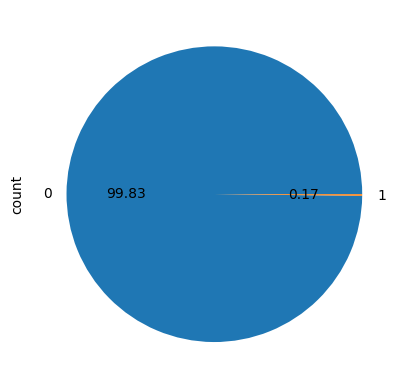

In [3]:
transacoes.Class.value_counts().plot.pie(autopct= '%.2f');

**Separando em treino e teste**

In [4]:
# Separando X e y
X = transacoes.drop('Class',axis=1)
y = transacoes.Class

In [5]:
# Separando em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=0,stratify=y)

### Realizando o random undersampling

In [6]:
# Importando o RandomUnderSampler do imblearn
from imblearn.under_sampling import RandomUnderSampler 

In [7]:
# Definindo o RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

In [8]:
# Definindo a nova amostra
X_resRU, y_resRU = rus.fit_resample(X_train, y_train)

### Regressão logistica

In [43]:
# Fazendo o fit
from sklearn.linear_model import LogisticRegression
clf_RL = LogisticRegression(random_state=42).fit(X_resRU, y_resRU)

In [44]:
# Fazendo a previsão
y_pred_RL = clf_RL.predict(X_test)
y_pred_proba_RL = clf_RL.predict_proba(X_test)[:,1]

In [45]:
# Visualizando a matriz de confusão
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_RL)

array([[90432,  3393],
       [   25,   137]], dtype=int64)

In [46]:
# Traçando a área sobre a curva precisão x recall
from sklearn import metrics
precision_RL,recall_RL,thresholds_RL = metrics.precision_recall_curve(y_test,y_pred_proba_RL)
print(metrics.auc(recall_RL, precision_RL))

0.6428389789694805


In [47]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred_RL)

0.845679012345679

In [48]:
# Definindo os parâmetros que queremos testar
parametros = {
    'C': [0.1,1,10,100],
    'solver': ['newton-cg','lbfgs','liblinear'],
}

In [49]:
# Selecionando a Regressão Logística
LogReg = LogisticRegression(random_state=42)

In [50]:
# Importando o GridSearchCV
from sklearn.model_selection import GridSearchCV

In [51]:
# Criando um novo classificador usando os parâmetros que escolhemos anteriormente
clf_RL = GridSearchCV(LogReg, parametros,
                     scoring='recall'
                     )

In [52]:
# Fazendo o fit dos nossos dados
clf_RL = clf_RL.fit(X_resRU,y_resRU)

C:\Users\viniv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\viniv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\viniv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\viniv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packag

In [53]:
# Visualizando os melhores parâmetros definidos pelo GridSearchCV 
clf_RL.best_params_

{'C': 10, 'solver': 'newton-cg'}

In [55]:
# Usando esse modelo para fazer as previsões
y_pred_RL = clf_RL.predict(X_test)

In [56]:
# Analisando a matriz de confusão
confusion_matrix(y_test,y_pred_RL)

array([[90762,  3063],
       [   15,   147]], dtype=int64)

In [34]:
# O recall
recall_score(y_test,y_pred_GS)

0.9074074074074074

In [35]:
# E a precisão
metrics.precision_score(y_test,y_pred_GS)

0.04579439252336449

### Random Forest

In [29]:
# Fazendo o fit
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(max_depth=2, random_state=0).fit(X_resRU, y_resRU)

In [30]:
# Fazendo a previsão
y_pred_RF = clf_RF.predict(X_test)
y_pred_proba_RF = clf_RF.predict_proba(X_test)[:,1]

In [31]:
# Visualizando a matriz de confusão
confusion_matrix(y_test,y_pred_RF)

array([[92977,   848],
       [   25,   137]], dtype=int64)

In [32]:
# Utilizando os parâmetros do Random Forest
parametros = {
    'n_estimators':[10,20,30,40,50],
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [2,3,4,5]
}

In [33]:
# Selecionando o Random Forest
RF_GS = RandomForestClassifier(random_state=0)

In [34]:
# Importando o GridSearchCV
from sklearn.model_selection import GridSearchCV

In [35]:
# Criando um novo classificador usando os parâmetros que escolhemos anteriormente
clf_GS2 = GridSearchCV(RF_GS,parametros,
                     scoring='recall'
                     )

In [36]:
# Fazendo o fit dos nossos dados
clf_GS2 = clf_GS2.fit(X_resRU,y_resRU)

In [37]:
# Visualizando os melhores parâmetros definidos pelo GridSearchCV 
clf_GS2.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 50}

In [38]:
# Usando esse modelo para fazer as previsões
y_pred_RF = clf_GS2.predict(X_test)

In [39]:
# Analisando a matriz de confusão
confusion_matrix(y_test,y_pred_RF)

array([[92106,  1719],
       [   22,   140]], dtype=int64)

In [ ]:
metrics.recall_score(y_test,y_pred_RF)

0.8641975308641975

### KNN

In [13]:
# Fazendo o fit
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=3).fit(X_resRU, y_resRU)

In [14]:
# Fazendo a previsão
y_pred_KNN = clf_KNN.predict(X_test)
y_pred_proba_KNN = clf_KNN.predict_proba(X_test)[:,1]

In [15]:
# Visualizando a matriz de confusão
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_KNN)  

array([[59798, 34027],
       [   59,   103]], dtype=int64)

In [16]:
# Traçando a área sobre a curva precisão x recall
from sklearn import metrics
precision_KNN,recall_KNN,thresholds_KNN = metrics.precision_recall_curve(y_test,y_pred_proba_KNN)
print(metrics.auc(recall_KNN, precision_KNN))

0.15134024533549362


In [17]:
# Utilizando os parâmetros do KNN
parametros = {
    'n_neighbors': [3,5,7],
    'algorithm': ['auto','ball_tree','kd_tree'],
    'weights': ['uniform','distance']
}

In [18]:
# Selecionando o KNN
KNN_GS = KNeighborsClassifier()

In [21]:
# Criando um novo classificador usando os parâmetros que escolhemos anteriormente
clf_GS = GridSearchCV(KNN_GS, parametros,
                     scoring='recall'
                     )

In [22]:
# Fazendo o fit dos nossos dados
clf_GS = clf_GS.fit(X_resRU,y_resRU)

In [23]:
# Visualizando os melhores parâmetros definidos pelo GridSearchCV 
clf_GS.best_params_

{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}

In [24]:
# Usando esse modelo para fazer as previsões
y_pred_GS = clf_GS.predict(X_test)

In [25]:
# Analisando a matriz de confusão
confusion_matrix(y_test,y_pred_GS)

array([[60920, 32905],
       [   57,   105]], dtype=int64)

### Matrizes

In [57]:
# Analisando a matriz de confusão
confusion_matrix(y_test,y_pred_RL)

array([[90762,  3063],
       [   15,   147]], dtype=int64)

In [41]:
# Analisando a matriz de confusão
confusion_matrix(y_test,y_pred_RF)

array([[92106,  1719],
       [   22,   140]], dtype=int64)

In [26]:
# Analisando a matriz de confusão
confusion_matrix(y_test,y_pred_GS)

array([[60920, 32905],
       [   57,   105]], dtype=int64)